# Search Algorithms applied to Teseo Problem - 09/03/2018

## Illustration

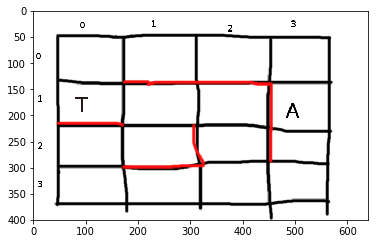

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("Teseo.png")
plt.imshow(image)
plt.show()
plt.figure(num=None, figsize=(15, 10), dpi=90, facecolor='w', edgecolor='k')

## Representation

In [2]:
START = 1
GOAL = 2
Teseo = [
    [0, 0, 0, 0],
    [1, 0, 0, 2],
    [0, 0, 0, 0],
    [0, 0, 0, 0]]

## Moves

In [3]:
illegal_moves_Teseo = {
    (0, 1): [[1, 1]],
    (0, 2): [[1, 2]],
    (1, 0): [[2, 0]],
    (1, 1): [[0, 1]],
    (1, 2): [[0, 2], [1, 3]],
    (1, 3): [[1, 2]],
    (2, 1): [[2, 2], [3, 1]],
    (2, 2): [[2, 1], [2, 3]],
    (2, 3): [[2, 2]],
    (3, 1): [[2, 1]]
}

In [4]:
# True if is a possible move
def isLegalMove(illegal_moves, initialPosition, finalPosition):
    if initialPosition in illegal_moves:
        for move in illegal_moves[initialPosition]:
            if move[0] == finalPosition[0] and move[1] == finalPosition[1]:
                return False
    if finalPosition[0] < 0 or finalPosition[0] > 3 or finalPosition[1] < 0 or finalPosition[1] > 3:
        return False
    return True

In [5]:
# Return [up, right, down, left] when legal
def createMoves(position):
    legalMovesList = []
    
    up = (position[0]-1,position[1])
    right = (position[0], position[1]+1)
    down = (position[0]+1, position[1])
    left = (position[0], position[1]-1)
    
    if isLegalMove(illegal_moves_Teseo, position, up): legalMovesList.append(up)
    if isLegalMove(illegal_moves_Teseo, position, right): legalMovesList.append(right)
    if isLegalMove(illegal_moves_Teseo, position, down): legalMovesList.append(down)
    if isLegalMove(illegal_moves_Teseo, position, left): legalMovesList.append(left)
        
    return legalMovesList

In [6]:
# True if I've reached the Goal
def checkGoal(matrix, cell):
    cellX, cellY = cell
    if matrix[cellX][cellY] == GOAL:
        return True
    else: return False

In [19]:
# Where Teseo is located in the map
def findPosition():
    startPosition = [0,0]
    for row in range(len(Teseo)):
        for col in range(len(Teseo)):
            if Teseo[row][col] == START:
                startPosition[0] = row
                startPosition[1] = col
                return startPosition

## BFS

In [7]:
# Delete this and write the DFS
def bfsTeseo(matrix, start):
    visited, stack = [start], [start]
    while stack:
        cell = stack.pop(0)
        legalMoves = createMoves(cell)
        
        for adjacentCell in legalMoves:
            if adjacentCell not in visited:
                visited.append(adjacentCell)
                stack.append(adjacentCell)
                    
            if checkGoal(matrix, adjacentCell): return visited
    return visited

### Check the visited cells with BFS

In [9]:
startRow, startCol = findPosition()
bfsVisited = bfsTeseo(Teseo, (startRow, startCol))

bfsVisited

[(1, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 2),
 (2, 1),
 (0, 2),
 (2, 2),
 (2, 0),
 (0, 3),
 (3, 2),
 (3, 0),
 (1, 3)]

In [10]:
from copy import deepcopy

def visitedCells(visitedList):
    Teseo_copy = deepcopy(Teseo)
    for cell in visitedList:
        x = cell[0]
        y = cell[1]
        Teseo_copy[x][y] = 1

    for i in range(len(Teseo_copy)):
        print(Teseo_copy[i])

In [11]:
visitedCells(bfsVisited)

[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 0]
[1, 0, 1, 0]


## DFS

In [12]:
def dfsTeseo(matrix, start):
    visited, stack = [], [start]
    while stack:
        cell = stack.pop()
        if cell not in visited:
            visited.append(cell)
            if checkGoal(matrix, cell): return visited
            
            legalMoves = createMoves(cell)
            stack.extend(move for move in legalMoves)
    return visited

### Check the visited cells with DFS

In [13]:
startRow, startCol = findPosition()
dfsVisited = dfsTeseo(Teseo, (startRow, startCol))

dfsVisited

[(1, 0),
 (1, 1),
 (2, 1),
 (2, 0),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (2, 3),
 (1, 3)]

In [14]:
visitedCells(dfsVisited)

[0, 0, 0, 0]
[1, 1, 0, 1]
[1, 1, 0, 1]
[1, 1, 1, 1]


# Recursive DFS

In [15]:
def dfs_recursive_support(matrix, cell, visited):
    if cell not in visited:
        visited.append(cell)
        if checkGoal(matrix, cell): return visited
        
        legalMoves = createMoves(cell)
        for adjacentCell in legalMoves:
            return dfs_recursive_support(matrix, adjacentCell, visited)
    
    
def dfs_rec_Teseo(matrix, start):
    visited = []
    return dfs_recursive_support(matrix, start, visited)

### Check the visited cells with Recursive DFS

In [16]:
startRow, startCol = findPosition()
dfs_recVisited = dfs_rec_Teseo(Teseo, (startRow, startCol))

dfs_recVisited

[(1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (1, 3)]

In [17]:
visitedCells(dfs_recVisited)

[1, 1, 1, 1]
[1, 0, 0, 1]
[0, 0, 0, 0]
[0, 0, 0, 0]
